In [81]:
# Python program to read
# json file

import os, json
import pandas as pd

path_to_json = 'results/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)  # for me this prints ['foo.json']


# Opening JSON file


['2021-09-06-15-15-57 - Tobias Markus.json', '2021-09-06-16-18-00 - Dominik Meier.json', '2021-09-06-17-11-22 - Joana Bergsiek.json', '2021-11-28-19-40-13 - William Lamm.json']


In [82]:


def leveltimes(file):
    file = json.load(file)
    i=0
    lvlCode = None
    levelLengths = {}
    nLevels=0
    start = 0
    end = 0
    ignore = False
    levelname = ""
    scenario = ""
    for event in file:
        i+=1
        if(event["name"]=="GameStartEvent"):
            lvlCode = event["levelCode"]
            print(event["name"])
        if(event["name"]=="LevelChangedEvent"):
            start = event["createdAt"]
            if(event["levelName"]=="LevelTraining(Clone)" or event["levelName"]=="Level1(Clone)"):
                ignore=True
            else:
                if lvlCode.startswith("1") and nLevels<3 or lvlCode.startswith("2") and nLevels>=3:
                    scenario="1"
                else:
                    scenario = "0"
                levelname=event["levelName"][5:7]+"_"+scenario

        if(event["name"]=="LevelCompletedEvent"):
            end = event["createdAt"]
            if(not ignore):
                levelLengths.update({levelname:(end-start)})
                nLevels+=1
            ignore = False
            end = 0
            start = 0
    if(len(levelLengths)>6):
        return "error, list too long"   
    if(lvlCode==None):
        print("error no level code was found")
        return None
    print(lvlCode,levelLengths)
    levelLengths.update({"condition":lvlCode})
    return levelLengths
#leveltimes(file)

In [83]:
import pandas as pd

frame = pd.DataFrame()
for i in json_files:
    file = open("./results/"+i)
    lis = leveltimes(file)
    nframe = pd.DataFrame([lis])
    frame=frame.append(nframe)
frame=frame.sort_index(axis=1)
print(frame)


GameStartEvent
2bbb {'2B_0': 16.66149999999999, '3B_0': 86.19530000000003, '4B_0': 89.75999999999993, '2A_1': 20.865999999999985, '3A_1': 19.052999999999997, '4A_1': 62.266999999999825}
GameStartEvent
1bbb {'2B_1': 73.42359999999996, '3B_1': 358.8229, '4B_1': 276.486, '2A_0': 89.21100000000001, '3A_0': 101.55300000000011, '4A_0': 45.92899999999986}
GameStartEvent
2aaa {'2A_0': 41.594799999999964, '3A_0': 34.315300000000036, '4A_0': 49.269499999999994, '2B_1': 48.49940000000004, '3B_1': 68.1413, '4B_1': 247.32049999999992}
GameStartEvent
1aaa {'2A_1': 52.07130000000001, '3A_1': 52.49959999999999, '4A_1': 308.67499999999995, '2B_0': 16.525999999999954, '3B_0': 59.05579999999998, '4B_0': 67.923}
      2A_0     2A_1     2B_0     2B_1      3A_0     3A_1     3B_0      3B_1  \
0      NaN  20.8660  16.6615      NaN       NaN  19.0530  86.1953       NaN   
0  89.2110      NaN      NaN  73.4236  101.5530      NaN      NaN  358.8229   
0  41.5948      NaN      NaN  48.4994   34.3153      NaN     

[65.40289999999999, 36.46865, 16.59374999999997, 60.9615, 67.93415000000007, 35.77629999999999, 72.62555, 213.4821, 47.59924999999993, 185.4709999999999, 78.84149999999997, 261.90324999999996] [23.80810000000002, 15.602650000000011, 0.06775000000001796, 12.462099999999962, 33.61885000000004, 16.723299999999995, 13.569750000000028, 145.34079999999997, 1.6702500000000668, 123.20400000000006, 10.918499999999966, 14.582750000000033] ['2A_0', '2A_1', '2B_0', '2B_1', '3A_0', '3A_1', '3B_0', '3B_1', '4A_0', '4A_1', '4B_0', '4B_1', 'condition']


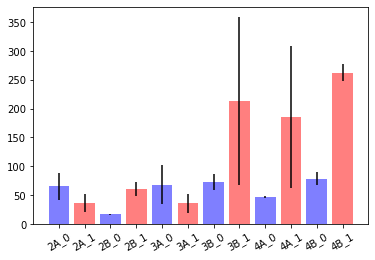

<Figure size 432x288 with 0 Axes>

In [84]:
#Average Time Condition 1 vs Condition 2
import matplotlib.pyplot as plt
import numpy as np


row_averages=frame.mean(axis=0).to_list()
row_errors=frame.sem(axis=0).to_list()
print(row_averages,row_errors,frame.columns.to_list())

color=["red" if x.endswith("1") else "blue" for x in frame.columns.to_list()]
plt.bar(frame.columns.to_list()[0:-1],row_averages,yerr=row_errors,alpha=0.5,align="center",color=color)
plt.xticks(rotation=30)
plt.title("Comparing Level Times By Condition")
plt.xlabel("Levels and Condition")
plt.ylabel("Completion Time")
plt.show()
plt.savefig("level_by_condition.png")



In [85]:
#By condition

58.16618333333332 132.34379999999996 ['2A_0', '2B_0', '3A_0', '3B_0', '4A_0', '4B_0'] ['2A_1', '2B_1', '3A_1', '3B_1', '4A_1', '4B_1']


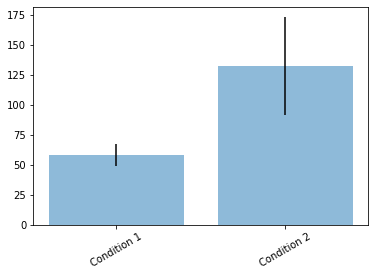

<Figure size 432x288 with 0 Axes>

In [86]:
import numpy as np
condition1=[x for x in frame.columns.to_list() if x.endswith("0")]
condition2=[x for x in frame.columns.to_list() if x.endswith("1")]

values1=np.mean([frame[x].mean() for x in condition1])
values2=np.mean([frame[x].mean() for x in condition2])

err1 = np.std([frame[x].mean() for x in condition1],ddof=1)/np.sqrt(len([frame[x].mean() for x in condition1]))
err2 = np.std([frame[x].mean() for x in condition2],ddof=1)/np.sqrt(len([frame[x].mean() for x in condition2]))

print(values1,values2,condition1,condition2)


plt.bar(["Condition 1","Condition 2"],[values1,values2],yerr=[err1,err2],alpha=0.5,align="center")
plt.xticks(rotation=30)
plt.title("Levels by Condition")
plt.xlabel("Condition")
plt.ylable("Completion Time")
plt.show()
plt.savefig("level_by_condition.png")

In [ ]:
#Confidence By Condition



#Accuracy By Condition